In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "MWMGxMDqoUFZgybCZuw8m7Jfw"
Consumer_Secret_Key = "8vwqmphfj2nHDiGamUWjGbknmWBbvGEivVIha4Oc3FBTuMTt8j" 
Access_Token = "1570376087703789571-2lZQvTlc7kokyY6iOLdJh9S3TKkpg0"
Access_Token_Secret = "JSvgBe7459AkkMJc0t18wx0x7Al5jiJM6tmNKhTl0TXgm"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="AXISgsm", count = 1000, lang = "id", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) Ini 2022 cepet banget dah, apa perasaan mimin doang ya? https://t.co/a7RUzNRBkA

2) @Iam_agaa Nurunin petirnya jangan sembarang yak

3) @acep_epo Masih belum terbaca 2023 mau jadi apa

4) @roni_namaku cyahhhhh!

5) @Sayaaguung akhirnya ya ngab



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"Ini 2022 cepet banget dah, apa perasaan mimin ..."
1,@Iam_agaa Nurunin petirnya jangan sembarang yak
2,@acep_epo Masih belum terbaca 2023 mau jadi apa
3,@roni_namaku cyahhhhh!
4,@Sayaaguung akhirnya ya ngab


In [ ]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)
  text = re.sub('_','',text)
  text = re.sub('yang','',text)
  text = re.sub('terimakasih','',text)
  text = re.sub('Yuk!','',text)
  text = re.sub('ya!','',text)
  text = re.sub('[^0-9A-Za-z \t]','',text)
  text = re.sub('(\w+:\/\/\S+)','',text) 

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Ini 2022 cepet banget dah apa perasaan mimin d...
1,agaa Nurunin petirnya jangan sembarang yak
2,epo Masih belum terbaca 2023 mau jadi apa
3,namaku cyahhhhh
4,akhirnya ya ngab
...,...
195,Halo kak Mohon maaf atas ketidaknyamanannya B...
196,Halo kak Mohon maaf atas ketidaknyamanannya B...
197,Kan masih ada ATM hihihi
198,Halo kak Mohon maaf atas ketidaknyamanannya B...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Ini 2022 cepet banget dah apa perasaan mimin d...,0.0,0.0
1,agaa Nurunin petirnya jangan sembarang yak,0.0,0.0
2,epo Masih belum terbaca 2023 mau jadi apa,0.0,0.0
3,namaku cyahhhhh,0.0,0.0
4,akhirnya ya ngab,0.0,0.0
...,...,...,...
195,Halo kak Mohon maaf atas ketidaknyamanannya B...,0.0,0.0
196,Halo kak Mohon maaf atas ketidaknyamanannya B...,0.0,0.0
197,Kan masih ada ATM hihihi,0.0,0.0
198,Halo kak Mohon maaf atas ketidaknyamanannya B...,0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

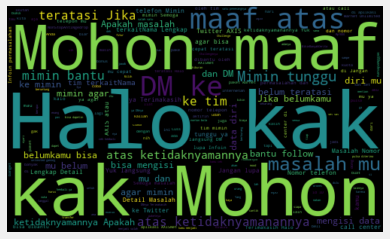

In [ ]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [ ]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Ini 2022 cepet banget dah apa perasaan mimin d...,0.0,0.0,Neutral
1,agaa Nurunin petirnya jangan sembarang yak,0.0,0.0,Neutral
2,epo Masih belum terbaca 2023 mau jadi apa,0.0,0.0,Neutral
3,namaku cyahhhhh,0.0,0.0,Neutral
4,akhirnya ya ngab,0.0,0.0,Neutral
...,...,...,...,...
195,Halo kak Mohon maaf atas ketidaknyamanannya B...,0.0,0.0,Neutral
196,Halo kak Mohon maaf atas ketidaknyamanannya B...,0.0,0.0,Neutral
197,Kan masih ada ATM hihihi,0.0,0.0,Neutral
198,Halo kak Mohon maaf atas ketidaknyamanannya B...,0.0,0.0,Neutral


In [ ]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

6)   Tbk Halo kak Mohon maaf atas ketidaknyamanannya Yuk langsung DM ke Twitter AXIS atau call center di 838 Jangan lupa Infoin permasalahan dan nomor telepon mu ya agar bisa dibantu oleh tim mimin Semoga masalah mu cepat teratasi

7)  Halo kak Mohon maaf atas ketidaknyamanannya Yuk langsung DM ke Twitter AXIS atau call center di 838 Jangan lupa Infoin permasalahan dan nomor telepon mu ya agar bisa dibantu oleh tim mimin Semoga masalah mu cepat teratasi

8) yamete Halo kak Mohon maaf atas ketidaknyamanannya Yuk langsung DM ke Twitter AXIS atau call center di 838 Jangan lupa Infoin permasalahan dan nomor telepon mu ya agar bisa dibantu oleh tim mimin Semoga masalah mu cepat teratasi

9) ghondronk Halo kak Mohon maaf atas ketidaknyamanannya Yuk langsung DM ke Twitter AXIS atau call center di 838 Jangan lupa Infoin permasalahan dan nomor telepon mu ya agar bisa dibantu oleh tim mimin Semoga masalah mu cepat teratasi

10)  Jika memang kamu sudah memenuhi syarat d

In [ ]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199)  HAHAHA benerrrr Bisa langsung wisuda kak 

200)  OMG mimin itungin dong haha Jadinya 3771000 Detik ya kak 

201)  Adanya  motif i love you nih Cuss checkout 

202) Aselii pake selimut ini bangun tidur fresh pikiran berkurang 



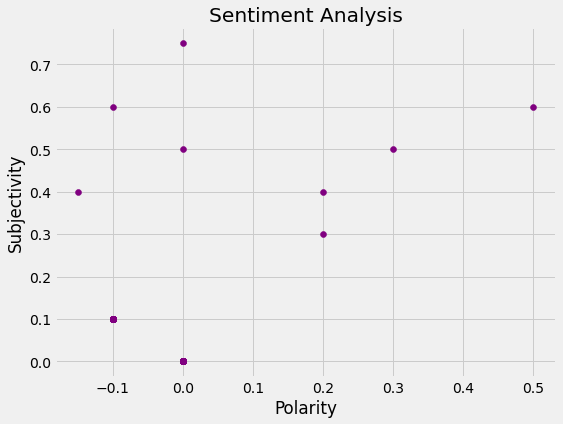

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Purple')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

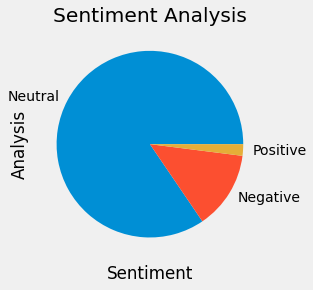

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df['Analysis'].value_counts()

Neutral     169
Negative     27
Positive      4
Name: Analysis, dtype: int64